# Lab 5: KNN

In this assignment, we will learn the KNN model.

First, please study the given example, which uses the KNN model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the KNN model to predict the presence of heart disease.


## 1. Example

### 1.1 Load the breast cancer data

Here, we use the [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset in sklearn. It is a binary classification dataset. Each sample has 30 numerical features, which can be found in [7.1.7](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples

Here, we use 69 samples as the testing set and use the remained samples to train the logistic regression model. 

In [2]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 500, test: 69


### 1.3 Train the KNN model and select the hyperparameter with cross-validation

Here, we use cross-validation to select the hyperparameter $K$

In [3]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.9640000000000001
{'n_neighbors': 4}


### 1.4 Evaluate the learned model

After getting the best hyperparameter $K$,  we evaluate this  model on the testing set. 

In [4]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.971, recall: 0.975, precision: 0.975, f1: 0.975,


## 2. Task

Here, we use the [heart disease](./heart.csv) dataset. Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The last column refers to the presence of heart disease in the patient.

The task is to predict whether a person has the heart disease. Here, you can use your code in Lab04 for Task 2.1 and Task 2.2. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)


In [5]:
import pandas as pd

In [6]:
heart_disease_df = pd.read_csv('heart.csv')

Check if there are missing values:

In [7]:
heart_disease_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values.

Check if there are categorical values:

In [8]:
heart_disease_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

There are no categorical values.

Check if the dataset is balanced:

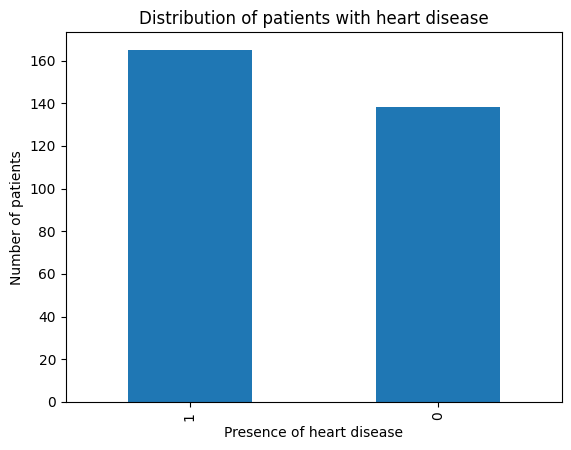

In [9]:
import matplotlib.pyplot as plt

plt.title('Distribution of patients with heart disease')
plt.xlabel('Presence of heart disease')
plt.ylabel('Number of patients')
heart_disease_df['target'].value_counts().plot(kind = 'bar')
plt.show()

The dataset is not balanced.
There are more patients with heart disease than those without heart disease in the dataset.

### 2.2 Split the data into two subsets and normalize the features of samples

* Split the dataset into the train_val set and testing set. 
* Normalize features

These are the possible test sizes for 5-fold cross validation:

In [10]:
n_folds = 5
possible_test_sizes = [round(1 - x/heart_disease_df.shape[0], ndigits=4) for x in range(220, 303, n_folds)]
possible_test_sizes

[0.2739,
 0.2574,
 0.2409,
 0.2244,
 0.2079,
 0.1914,
 0.1749,
 0.1584,
 0.1419,
 0.1254,
 0.1089,
 0.0924,
 0.0759,
 0.0594,
 0.0429,
 0.0264,
 0.0099]

I choose 0.2409 as the test size.

In [11]:
heart_disease_features = heart_disease_df.drop('target', axis=1)
heart_disease_target = heart_disease_df['target']
X_train_validation, X_test, y_train_validation, y_test = train_test_split(heart_disease_features.values,
                                                                          heart_disease_target.values,
                                                                          test_size=0.2409,
                                                                          random_state=42)


print(f'samples: {heart_disease_features.shape[0]}, train_val: {X_train_validation.shape[0]}, test: {X_test.shape[0]}')

normalizer = StandardScaler()
X_train_validation = normalizer.fit_transform(X_train_validation)
X_test = normalizer.transform(X_test)

samples: 303, train_val: 230, test: 73


### 2.3 Train the KNN model and select the hyperparameter with cross-validation


* Use the 5-fold cross-validation to select the hyperparameter $K$.
* Search $K$ from $\{1, 2, 3, 4, 5\}$


In [12]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn = KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_validation, y_train_validation)

print(grid.best_score_)
print(grid.best_params_)

0.808695652173913
{'n_neighbors': 3}


### 2.4 Evaluate the learned model

* Report the prediction accuracy, recall, precision, and F1 score.

* Note that you should implement the code for these metrics by yourself. Please do NOT use the built-in function in sklearn. 

Make prediction:

In [13]:
clf_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_validation, y_train_validation)

y_test_prediction = clf_knn.predict(X_test)

Define functions to calculate accuracy, recall, precision, and F1 score:

In [14]:
def calculate_true_positive(y, y_hat):
    return np.sum([a == 1 and b == 1 for (a, b) in zip(y, y_hat)])

In [15]:
def calculate_false_positive(y, y_hat):
    return np.sum([a == 0 and b == 1 for (a, b) in zip(y, y_hat)])

In [16]:
def calculate_false_negative(y, y_hat):
    return np.sum([a == 1 and b == 0 for (a, b) in zip(y, y_hat)])

In [17]:
def calculate_true_negative(y, y_hat):
    return np.sum([a == 0 and b == 0 for (a, b) in zip(y, y_hat)])

In [18]:
def calculate_accuracy(y, y_hat):
    number_of_correct_predictions = np.sum(y == y_hat)
    total_number_of_predictions = y.size
    return number_of_correct_predictions / total_number_of_predictions

In [19]:
def calculate_recall(y, y_hat):
    tp = calculate_true_positive(y, y_hat)
    fn = calculate_false_negative(y, y_hat)
    return tp / (tp + fn)

In [20]:
def calculate_precision(y, y_hat):
    tp = calculate_true_positive(y, y_hat)
    fp = calculate_false_positive(y, y_hat)
    return tp / (tp + fp)

In [21]:
def calculate_f1(y, y_hat):
    recall = calculate_recall(y, y_hat)
    precision = calculate_precision(y, y_hat)
    return (2 * recall * precision) / (recall + precision)

Report accuracy, recall, precision, and F1 score:

In [22]:
calculate_accuracy(y_test, y_test_prediction)

0.8493150684931506

In [23]:
calculate_recall(y_test, y_test_prediction)

0.7948717948717948

In [24]:
calculate_precision(y_test, y_test_prediction)

0.9117647058823529

In [25]:
calculate_f1(y_test, y_test_prediction)

0.8493150684931507

Based on my calculations, the scores are as follows:

- Accuracy = 0.849

- Recall = 0.795

- Precision = 0.912

- F1 = 0.849

Verify calculations using sklearn:

In [26]:
acc = accuracy_score(y_test, y_test_prediction)
f1 = f1_score(y_test, y_test_prediction)
recall = recall_score(y_test, y_test_prediction)
precision = precision_score(y_test, y_test_prediction)

print(f'accuracy: {acc:.3f}, recall: {recall:.3f}, precision: {precision:.3f}, f1: {f1:.3f}')

accuracy: 0.849, recall: 0.795, precision: 0.912, f1: 0.849
